
## ELECTRIC GENERATION DATASET

* Electricity generation
* Generation demand

In [1]:
import pandas as pd
import os

In [2]:
demand_df = pd.read_csv(r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Phase 5-SDG-ELECTRICITY\electricity_generation_demand\electricity_data\electricity-demand.csv')
demand_df

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [3]:
generation_df = pd.read_csv(r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Phase 5-SDG-ELECTRICITY\electricity_generation_demand\electricity_data\electricity-generation.csv')
generation_df

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [4]:
# Concatenate all DataFrames
elec_gen_df = pd.concat([demand_df, generation_df], ignore_index=True)
elec_gen_df

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61,NaN
1,ASEAN (Ember),NaN,2001,404.85,NaN
2,ASEAN (Ember),NaN,2002,433.19,NaN
3,ASEAN (Ember),NaN,2003,458.24,NaN
4,ASEAN (Ember),NaN,2004,496.56,NaN
...,...,...,...,...,...
13270,Zimbabwe,ZWE,2018,NaN,9.44
13271,Zimbabwe,ZWE,2019,NaN,8.49
13272,Zimbabwe,ZWE,2020,NaN,6.71
13273,Zimbabwe,ZWE,2021,NaN,8.46


In [7]:


# Filter the data for Kenya
kenya_gen_data = elec_gen_df[elec_gen_df['Entity'] == 'Kenya']
kenya_gen_data



,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
2784,Kenya,KEN,2000,4.51,NaN
2785,Kenya,KEN,2001,4.98,NaN
2786,Kenya,KEN,2002,5.37,NaN
2787,Kenya,KEN,2003,5.67,NaN
2788,Kenya,KEN,2004,6.32,NaN
2789,Kenya,KEN,2005,6.70,NaN
2790,Kenya,KEN,2006,7.47,NaN
2791,Kenya,KEN,2007,6.63,NaN
2792,Kenya,KEN,2008,6.13,NaN
2793,Kenya,KEN,2009,6.56,NaN


In [13]:
# Check the column names
print("\nColumns in the DataFrame:")
print(kenya_gen_data.columns)


Columns in the DataFrame:
Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh',
       'Electricity generation - TWh'],
      dtype='object')


In [14]:
# Check the data types of each column
print("\nData types of each column:")
print(kenya_gen_data.dtypes)


Data types of each column:
Entity                           object
Code                             object
Year                              int64
Electricity demand - TWh        float64
Electricity generation - TWh    float64
dtype: object


In [15]:
# Get a summary of the unique entities in the 'Entity' column (to confirm how well "Kenya" is represented)
print("\nUnique values in the 'Entity' column:")
print(kenya_gen_data['Entity'].unique())


Unique values in the 'Entity' column:
['Kenya']


In [20]:
# Check for any missing values in the Kenya dataset
print("\nMissing values in Kenya dataset:")
print(kenya_gen_data.isna().sum())


Missing values in Kenya dataset:
Entity                           0
Code                             0
Year                             0
Electricity demand - TWh        24
Electricity generation - TWh    24
dtype: int64


In [21]:
# Impute missing values in both columns with the median (or mean if preferred)
kenya_gen_data['Electricity demand - TWh'].fillna(kenya_gen_data['Electricity demand - TWh'].median(), inplace=True)
kenya_gen_data['Electricity generation - TWh'].fillna(kenya_gen_data['Electricity generation - TWh'].median(), inplace=True)

# Check if any missing values remain
print(kenya_gen_data.isna().sum())


Entity                          0
Code                            0
Year                            0
Electricity demand - TWh        0
Electricity generation - TWh    0
dtype: int64


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


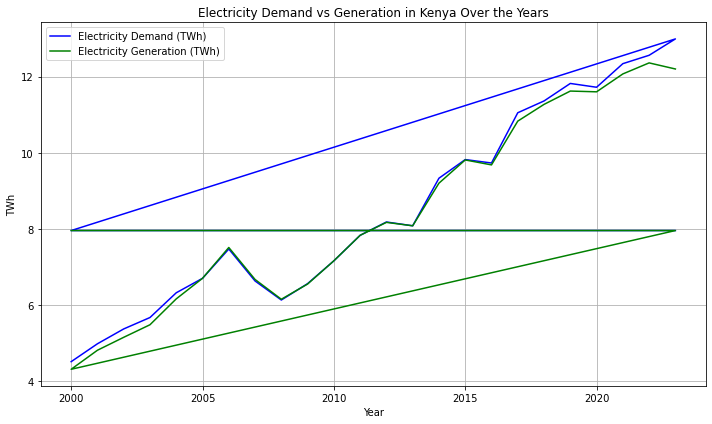

In [22]:
import matplotlib.pyplot as plt

# Plot electricity demand and generation against years
plt.figure(figsize=(10, 6))
plt.plot(kenya_gen_data['Year'],kenya_gen_data['Electricity demand - TWh'], label='Electricity Demand (TWh)', color='blue')
plt.plot(kenya_gen_data['Year'], kenya_gen_data['Electricity generation - TWh'], label='Electricity Generation (TWh)', color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('TWh')
plt.title('Electricity Demand vs Generation in Kenya Over the Years')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Generation vs Demand summary...
